In [19]:
from Matcher import *
import urllib2
sns.set_style('whitegrid')
%matplotlib inline

In [20]:
test = pd.DataFrame.from_csv('test_pre.csv', index_col=None)
control = pd.DataFrame.from_csv('control_pre.csv', index_col=None)

In [21]:
test.head()

,architecture,avg_active_ticks,avg_pings_per_day,build_version,client_id,cores,final_default,final_telemetry,has_system,inital_telemetry,initial_default,memory_mb,most_consecutive_days,os,total_active_days,treatment,unique_locales,weekend_days
0,x86,153.399994,2.500000,44.0,344cb05b-27cf-4ba0-8513-380f34fe576f,4.0,True,False,True,False,True,16317,0,Windows_NT,2,True,1,1
1,x86-64,191.012817,3.900000,43.0.4,47d457a8-a0bb-4db1-8bd6-f0d09260f0f1,2.0,True,False,True,False,True,3976,25,Windows_NT,40,True,1,13
2,x86,231.156250,2.909091,44.0.2,ab3df6bc-fbea-43ae-99df-6f81cd16ecbb,3.0,True,False,False,False,True,8138,5,Windows_NT,11,True,1,0
3,x86,193.576584,1.585714,44.0,b8ccd163-91f5-4d14-af4b-8b3bcdbd940f,2.0,True,False,True,False,False,6052,45,Windows_NT,70,True,1,19
4,x86-64,1609.875000,1.230769,44.0.2,e15080b4-5c52-a247-a12b-aa6c100783bc,4.0,True,False,False,False,True,16384,6,Darwin,13,True,1,2


In [4]:
# def get_sample_data():
#     # data on admissions based on GRE, GPA, and class rank
#     import urllib2
#     path='http://www.ats.ucla.edu/stat/data/binary.csv'
#     data = pd.read_csv(urllib2.urlopen(path), index_col=None)
#     test, control = data[data.admit==1], data[data.admit==0]
#     return test, control
# test, control = get_sample_data()

In [22]:
m = Matcher(test, control, exclude=['client_id', 'unique_locales'], stepwise=True)

In [ ]:
m.fit_scores(balance=True, nmodels=20)

n_majority: 155375
n_minority: 9026
Optimizing Forumla via forward stepwise selection...


In [ ]:
m.formula

In [7]:
m.predict_scores()

Caclculating Propensity Scores...100.0%

In [8]:
m.match(nmatches='random', max_rand=5)

Matching Control to Test...100.0%

Matcher.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.matched_data['match_id'] = match_ids


In [9]:
m.ks_by_column()

,var,p_before,p_after
0,avg_active_ticks,0.0,0.000000
1,avg_pings_per_day,0.0,0.000006
2,cores,0.0,0.000024
3,memory_mb,0.0,0.000000
4,most_consecutive_days,0.0,0.000055
5,total_active_days,0.0,0.011016
6,weekend_days,0.0,0.000000


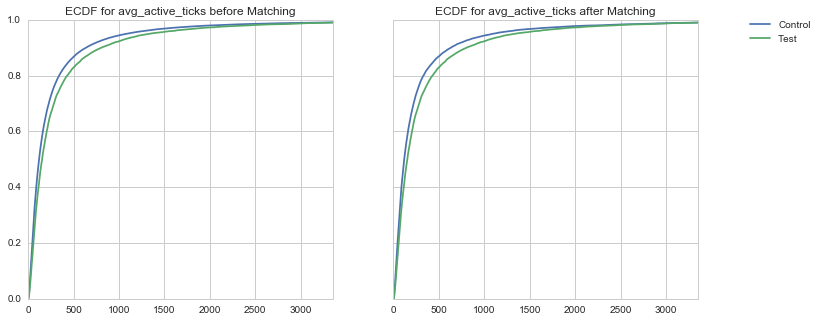

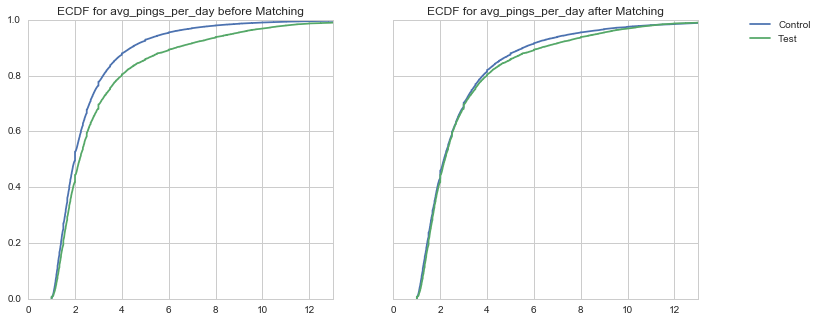

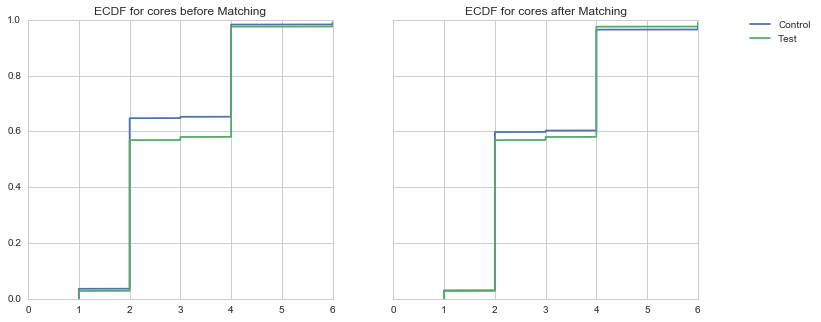

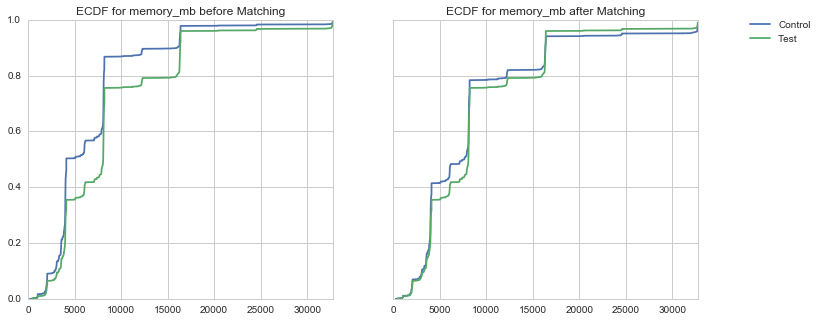

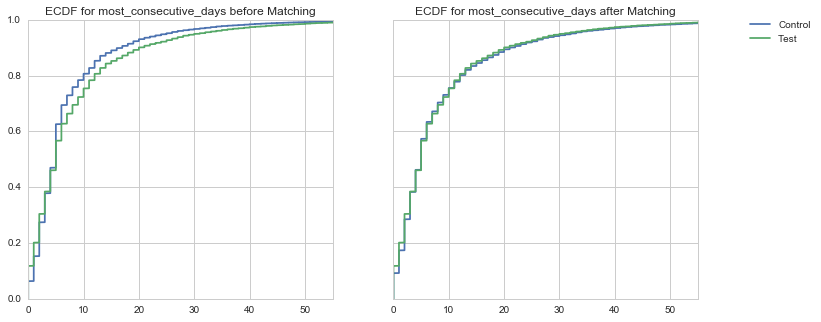

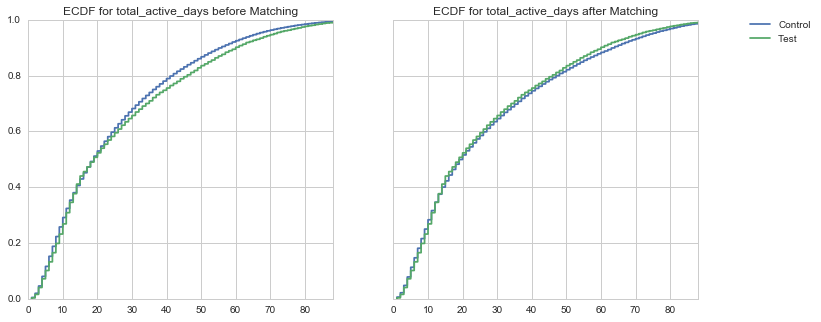

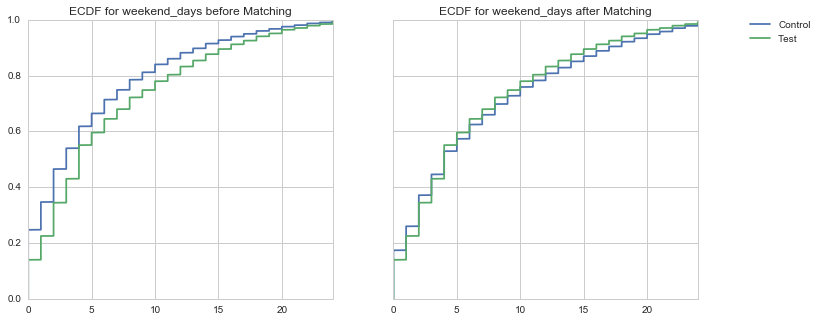

In [18]:
m.plot_ecdfs()

In [ ]:
stats.ks_2samp()

In [15]:
def ks_boot(tr, co, nboots=1000):
    nx = len(tr)
    ny = len(co)
    w = tr.append(co)
    obs = len(w)
    cutp = nx
    ks_boot_pval = None
    bbcount = 0
    ss = []
    fs_ks, _ = stats.ks_2samp(tr, co)
    for bb in range(nboots):
        sw = np.random.choice(w, obs, replace=True)
        x1tmp = sw[:cutp]
        x2tmp = sw[cutp:]
        s_ks, _ = stats.ks_2samp(x1tmp, x2tmp)
        ss.append(s_ks)
        sys.stdout.write('\r{} -- {} -- {}'.format(bb, fs_ks, s_ks))
        if s_ks >= fs_ks:
            bbcount += 1
    print fs_ks
    plt.hist(ss)
    ks_boot_pval = bbcount / float(nboots)
    return ks_boot_pval
        


999 -- 0.086960454459 -- 0.01002719202720.086960454459


0.0

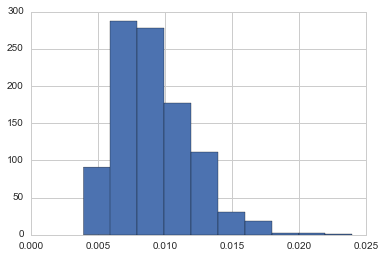

In [17]:
t = m.data[m.data.treatment == 1].avg_pings_per_day
c = m.data[m.data.treatment == 0].avg_pings_per_day

ks_boot(t, c)

In [164]:
len(t), len(t.append(c))

(9026, 164401)

In [139]:
tr.append(tr)

In [173]:
m.data.describe()

,avg_active_ticks,avg_pings_per_day,cores,memory_mb,most_consecutive_days,total_active_days,treatment,unique_locales,weekend_days,scores
count,164401.000000,164401.000000,164401.000000,164401.000000,164401.000000,164401.000000,164401.000000,164401.0,164401.000000,164401.000000
mean,377.165252,2.564677,2.753110,7173.120893,7.339961,25.263259,0.054902,1.0,5.069902,0.448010
std,3587.072127,1.943677,1.356022,8408.473319,9.262757,20.209599,0.227790,0.0,5.730603,0.145630
min,0.000000,1.000000,1.000000,191.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.079617
25%,54.550632,1.500000,2.000000,3895.000000,2.000000,9.000000,0.000000,1.0,1.000000,0.343010
50%,121.519234,2.000000,2.000000,5080.000000,5.000000,19.000000,0.000000,1.0,3.000000,0.425383
75%,276.474365,2.904762,4.000000,8109.000000,8.000000,37.000000,0.000000,1.0,8.000000,0.525089
max,448289.687500,125.000000,48.000000,524275.000000,95.000000,100.000000,1.000000,1.0,29.000000,1.000000


In [174]:
%%bash
python -m pytest matcher_test.py

============================= test session starts ==============================
platform linux2 -- Python 2.7.12, pytest-2.9.2, py-1.4.31, pluggy-0.3.1
rootdir: /home/hadoop/analyses, inifile: 
collected 3 items

matcher_test.py ...

=========================== 3 passed in 2.36 seconds ===========================
